**以下のセルは初回のみ実施が必要。一度やったらコメントアウトまたは削除してもよい。**

In [1]:
#import Pkg
#Pkg.add("CGcoefficient")
#Pkg.add("Plots")
#Pkg.add("PyPlot")
#Pkg.add("LaTeXStrings")

**ここから本番**

*まずは必要なJuliaのソースコードの読み込み*

In [2]:
include("basic.jl")
include("math.jl")
include("nuclei.jl")
include("shfbcs.jl")
include("crpa.jl")

Main.Crpa

*計算を実行させるセル*

In [3]:
using Plots
using LaTeXStrings
using .Basic
using .Nuclei
using .Shfbcs
using .Math
using .Crpa

function main(nucl::Nucleus, mf::MeanField, skyrme::Skyrme, crpa::CRPA)
    #Skyrme-Hartree-Fockの実施
    Calc_shfbcs(nucl, skyrme, mf)
    #Linear Response の計算の実施
    Calc_continuum(nucl, skyrme, mf, crpa)
end

main (generic function with 1 method)

**プログラムをコントロールするセル、基本的にここをいじる**

In [4]:
#原子核を準備する。
#                 Z    A
nucl=Set_nucleus(20, 40)

#Skyrme相互作用を準備する（ここではゼロレンジ Skyrme型の相互作用を用いる)
t0,t1,t2,t3,x0,x1,x2,x3,w0,w0p,alp,vpair,ij2=SkyrmeParameter("skm")
skyrme=Skyrme(t0,t1,t2,t3,x0,x1,x2,x3,w0,w0p,alp,vpair,ij2)

#Skyrme-Hartree-Fockの準備
mf=MeanField()
fill!(mf.Binv, nucl.Binv0)

#Linear Response の計算の準備
crpa=CRPA()
crpa.ISV=0 # 0:Isoscalar 1:Isovector
crpa.L=2 # Angular momentum of external field
crpa.scalingf=0.5 #Scaling factor for residual interaction

@time main(nucl, mf, skyrme, crpa)

neutron
 Num      energy   node j  l   occupation
  10    -1.3322976   0  5  3    0.0000000
   9    -3.4059704   1  1  1    0.0000000
   8    -5.7446149   1  3  1    0.0000000
   7   -10.0837123   0  7  3    0.0000000
   6   -14.3152233   0  3  2    1.0000000
   5   -16.7382345   1  1  0    1.0000000
   4   -21.3719083   0  5  2    1.0000000
   3   -28.5599026   0  1  1    1.0000000
   2   -32.6707064   0  3  1    1.0000000
   1   -43.8144988   0  1  0    1.0000000
FermiE -12.5000000
 
proton
 Num      energy   node j  l   occupation
   7    -3.3279969   0  7  3    0.0000000
   6    -7.4687053   0  3  2    1.0000000
   5    -9.7384471   1  1  0    1.0000000
   4   -14.3320344   0  5  2    1.0000000
   3   -21.3749782   0  1  1    1.0000000
   2   -25.3935688   0  3  1    1.0000000
   1   -36.3260433   0  1  0    1.0000000
FermiE  -5.0000000
106.662605 seconds (1.24 G allocations: 26.925 GiB, 6.53% gc time, 4.92% compilation time)


** 図の描写をする **

In [5]:
#束縛エネルギーの出力
println("  Total Energy=",nucl.Etot)
println(" Proton radius=",nucl.radii[1])
println("Neutron radius=",nucl.radii[2])
println("  Total radius=",nucl.radii[3])

  Total Energy=-341.0471428209616
 Proton radius=3.4259242323912287
Neutron radius=3.37662813955355
  Total radius=3.4013654933651494


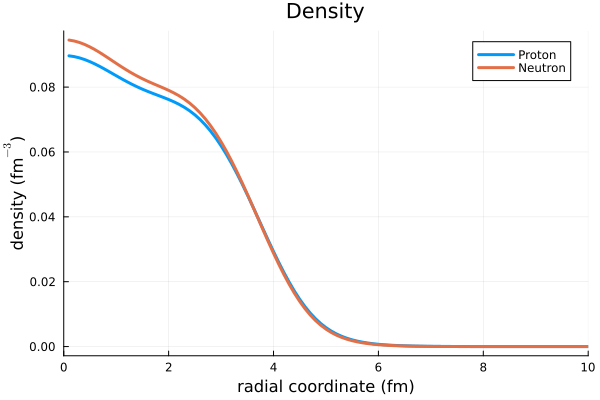

In [6]:
#Skyrme-Hartree-Fockで得られた密度の出力
r=Vector(dr:dr:rbox)
plot(r, nucl.rho[:,1], xlabel="radial coordinate (fm)", ylabel="density (fm\$ ^{-3}\$)", xlims=(0,10), lw=3, label="Proton", title="Density")
plot!(r, nucl.rho[:,2], lw=3, label="Neutron")
#savefig("density.png")

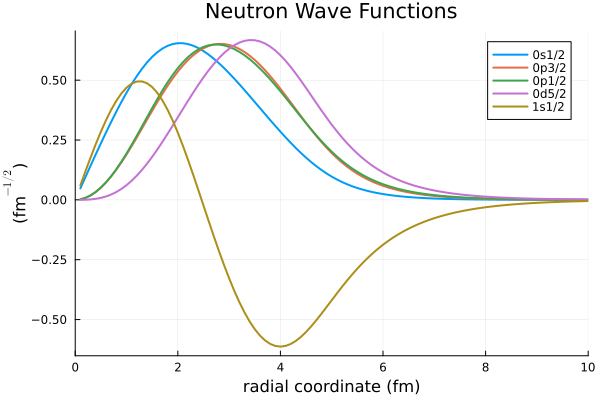

In [7]:
#Skyrme-Hartree-Fockで得られた波動関数の出力
plot(r, nucl.psi[:,1,2], xlabel="radial coordinate (fm)", ylabel="(fm\$ ^{-1/2}\$)", xlims=(0,10), lw=2, label="0s1/2", title="Neutron Wave Functions")
plot!(r, nucl.psi[:,2,2], lw=2, label="0p3/2")
plot!(r, nucl.psi[:,3,2], lw=2, label="0p1/2")
plot!(r, nucl.psi[:,4,2], lw=2, label="0d5/2")
plot!(r, nucl.psi[:,5,2], lw=2, label="1s1/2")
#savefig("wavefunc-Ca40.png")

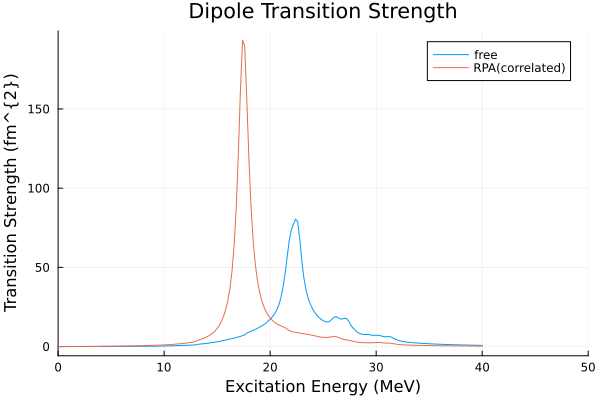

In [8]:
#Cotinuume-RPAで遷移強度の出力
plot(crpa.ex, crpa.str_free, xlabel="Excitation Energy (MeV)", ylabel="Transition Strength (fm^{2})", xlims=(0,50), label="free", title="Dipole Transition Strength")
plot!(crpa.ex, crpa.str_rpa, label="RPA(correlated)")

$$ rY_{10}=\sqrt{3/4\pi} z $$